In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s3e2/train.csv")
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [3]:
test = pd.read_csv("/kaggle/input/playground-series-s3e2/test.csv")
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes


In [4]:
test_1 = test.__deepcopy__()

In [5]:
test_1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes


In [6]:
train = train.drop(['id'], axis=1)
train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [7]:
test = test.drop(['id'], axis=1)
test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes


In [8]:
train.gender.value_counts()

Female    9446
Male      5857
Other        1
Name: gender, dtype: int64

In [9]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
#label_encoder = preprocessing.LabelEncoder()
  
#train['gender']= label_encoder.fit_transform(train['gender'])
  
#train['gender'].unique()

one_hot_encoded_data = pd.get_dummies(train['gender'])
one_hot_encoded_data.columns = ['Female', 'Male', 'Other']
#type(one_hot_encoded_data)
#print (one_hot_encoded_data.columns)
#one_hot_encoded_data.head()
#print(one_hot_encoded_data)
train['gender_Female'] = one_hot_encoded_data['Female']
train['gender_Male'] = one_hot_encoded_data['Male']
train = train.drop(['gender'], axis=1)
train.head()


,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male
0,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0,0,1
1,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0,0,1
2,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0,1,0
3,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0,0,1
4,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0,1,0


In [10]:
#test['gender']= label_encoder.fit_transform(test['gender'])
  
#test['gender'].unique()

one_hot_encoded_data = pd.get_dummies(test['gender'])
one_hot_encoded_data.columns = ['Female', 'Male', 'Other']
test['gender_Female'] = one_hot_encoded_data['Female']
test['gender_Male'] = one_hot_encoded_data['Male']
test = test.drop(['gender'], axis=1)
test.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,gender_Female,gender_Male
0,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown,1,0
1,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown,0,1
2,5.0,0,0,No,children,Urban,103.72,19.5,Unknown,1,0
3,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes,1,0
4,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes,0,1


In [11]:
train.ever_married.value_counts()

Yes    10385
No      4919
Name: ever_married, dtype: int64

In [12]:
#train['ever_married']= label_encoder.fit_transform(train['ever_married'])
  
#train['ever_married'].unique()

one_hot_encoded_data = pd.get_dummies(train['ever_married'])
one_hot_encoded_data.columns = ['NotMarried', 'Married']
train['NotMarried'] = one_hot_encoded_data['NotMarried']
train = train.drop(['ever_married'], axis=1)
train.head()

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,NotMarried
0,28.0,0,0,Private,Urban,79.53,31.1,never smoked,0,0,1,0
1,33.0,0,0,Private,Rural,78.44,23.9,formerly smoked,0,0,1,0
2,42.0,0,0,Private,Rural,103.00,40.3,Unknown,0,1,0,0
3,56.0,0,0,Private,Urban,64.87,28.8,never smoked,0,0,1,0
4,24.0,0,0,Private,Rural,73.36,28.8,never smoked,0,1,0,1


In [13]:
#test['ever_married']= label_encoder.fit_transform(test['ever_married'])
  
#test['ever_married'].unique()

one_hot_encoded_data = pd.get_dummies(test['ever_married'])
one_hot_encoded_data.columns = ['NotMarried', 'Married']
test['NotMarried'] = one_hot_encoded_data['NotMarried']
test = test.drop(['ever_married'], axis=1)
test.head()

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,gender_Female,gender_Male,NotMarried
0,57.0,0,0,Private,Rural,82.54,33.4,Unknown,1,0,0
1,70.0,1,0,Private,Urban,72.06,28.5,Unknown,0,1,0
2,5.0,0,0,children,Urban,103.72,19.5,Unknown,1,0,1
3,56.0,0,0,Govt_job,Urban,69.24,41.4,smokes,1,0,0
4,32.0,0,0,Private,Rural,111.15,30.1,smokes,0,1,0


In [14]:
train.work_type.value_counts()

Private          9752
children         2038
Self-employed    1939
Govt_job         1533
Never_worked       42
Name: work_type, dtype: int64

In [15]:
#train['work_type']= label_encoder.fit_transform(train['work_type'])
  
#train['work_type'].unique()

one_hot_encoded_data = pd.get_dummies(train['work_type'])
one_hot_encoded_data.columns = ['Govt_job', 'Never_worked','Private', 'Self-employed','children' ]
train['Govt_job'] = one_hot_encoded_data['Govt_job']
train['Never_worked'] = one_hot_encoded_data['Never_worked']
train['Private'] = one_hot_encoded_data['Private']
train['Self-employed'] = one_hot_encoded_data['Self-employed']
train = train.drop(['work_type'], axis=1)
train.head()

,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,NotMarried,Govt_job,Never_worked,Private,Self-employed
0,28.0,0,0,Urban,79.53,31.1,never smoked,0,0,1,0,0,0,1,0
1,33.0,0,0,Rural,78.44,23.9,formerly smoked,0,0,1,0,0,0,1,0
2,42.0,0,0,Rural,103.00,40.3,Unknown,0,1,0,0,0,0,1,0
3,56.0,0,0,Urban,64.87,28.8,never smoked,0,0,1,0,0,0,1,0
4,24.0,0,0,Rural,73.36,28.8,never smoked,0,1,0,1,0,0,1,0


In [16]:
#test['work_type']= label_encoder.fit_transform(test['work_type'])
  
#test['work_type'].unique()

one_hot_encoded_data = pd.get_dummies(test['work_type'])
one_hot_encoded_data.columns = ['Govt_job', 'Never_worked','Private', 'Self-employed','children' ]
test['Govt_job'] = one_hot_encoded_data['Govt_job']
test['Never_worked'] = one_hot_encoded_data['Never_worked']
test['Private'] = one_hot_encoded_data['Private']
test['Self-employed'] = one_hot_encoded_data['Self-employed']
test = test.drop(['work_type'], axis=1)
test.head()

,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,gender_Female,gender_Male,NotMarried,Govt_job,Never_worked,Private,Self-employed
0,57.0,0,0,Rural,82.54,33.4,Unknown,1,0,0,0,0,1,0
1,70.0,1,0,Urban,72.06,28.5,Unknown,0,1,0,0,0,1,0
2,5.0,0,0,Urban,103.72,19.5,Unknown,1,0,1,0,0,0,0
3,56.0,0,0,Urban,69.24,41.4,smokes,1,0,0,1,0,0,0
4,32.0,0,0,Rural,111.15,30.1,smokes,0,1,0,0,0,1,0


In [17]:
train.Residence_type.value_counts()

Rural    7664
Urban    7640
Name: Residence_type, dtype: int64

In [18]:
#train['Residence_type']= label_encoder.fit_transform(train['Residence_type'])
  
#train['Residence_type'].unique()
one_hot_encoded_data = pd.get_dummies(train['Residence_type'])
one_hot_encoded_data.columns = ['Urban', 'Rural']
train['Rural'] = one_hot_encoded_data['Rural']
train = train.drop(['Residence_type'], axis=1)
train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,NotMarried,Govt_job,Never_worked,Private,Self-employed,Rural
0,28.0,0,0,79.53,31.1,never smoked,0,0,1,0,0,0,1,0,1
1,33.0,0,0,78.44,23.9,formerly smoked,0,0,1,0,0,0,1,0,0
2,42.0,0,0,103.00,40.3,Unknown,0,1,0,0,0,0,1,0,0
3,56.0,0,0,64.87,28.8,never smoked,0,0,1,0,0,0,1,0,1
4,24.0,0,0,73.36,28.8,never smoked,0,1,0,1,0,0,1,0,0


In [19]:
#test['Residence_type']= label_encoder.fit_transform(test['Residence_type'])
  
#test['Residence_type'].unique()
one_hot_encoded_data = pd.get_dummies(test['Residence_type'])
one_hot_encoded_data.columns = ['Urban', 'Rural']
test['Rural'] = one_hot_encoded_data['Rural']
test = test.drop(['Residence_type'], axis=1)
test.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Female,gender_Male,NotMarried,Govt_job,Never_worked,Private,Self-employed,Rural
0,57.0,0,0,82.54,33.4,Unknown,1,0,0,0,0,1,0,0
1,70.0,1,0,72.06,28.5,Unknown,0,1,0,0,0,1,0,1
2,5.0,0,0,103.72,19.5,Unknown,1,0,1,0,0,0,0,1
3,56.0,0,0,69.24,41.4,smokes,1,0,0,1,0,0,0,1
4,32.0,0,0,111.15,30.1,smokes,0,1,0,0,0,1,0,0


In [20]:
train.smoking_status.value_counts()

never smoked       6281
Unknown            4543
formerly smoked    2337
smokes             2143
Name: smoking_status, dtype: int64

In [21]:
#train['smoking_status']= label_encoder.fit_transform(train['smoking_status'])
  
#train['smoking_status'].unique()

one_hot_encoded_data = pd.get_dummies(train['smoking_status'])
train['formerly_smoked'] = one_hot_encoded_data['formerly smoked']
train['never_smoked'] = one_hot_encoded_data['never smoked']
train['smokes'] = one_hot_encoded_data['smokes']
train = train.drop(['smoking_status'], axis=1)
train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,NotMarried,Govt_job,Never_worked,Private,Self-employed,Rural,formerly_smoked,never_smoked,smokes
0,28.0,0,0,79.53,31.1,0,0,1,0,0,0,1,0,1,0,1,0
1,33.0,0,0,78.44,23.9,0,0,1,0,0,0,1,0,0,1,0,0
2,42.0,0,0,103.00,40.3,0,1,0,0,0,0,1,0,0,0,0,0
3,56.0,0,0,64.87,28.8,0,0,1,0,0,0,1,0,1,0,1,0
4,24.0,0,0,73.36,28.8,0,1,0,1,0,0,1,0,0,0,1,0


In [22]:
#test['smoking_status']= label_encoder.fit_transform(test['smoking_status'])
  
#test['smoking_status'].unique()

one_hot_encoded_data = pd.get_dummies(test['smoking_status'])
test['formerly_smoked'] = one_hot_encoded_data['formerly smoked']
test['never_smoked'] = one_hot_encoded_data['never smoked']
test['smokes'] = one_hot_encoded_data['smokes']
test = test.drop(['smoking_status'], axis=1)
test.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,NotMarried,Govt_job,Never_worked,Private,Self-employed,Rural,formerly_smoked,never_smoked,smokes
0,57.0,0,0,82.54,33.4,1,0,0,0,0,1,0,0,0,0,0
1,70.0,1,0,72.06,28.5,0,1,0,0,0,1,0,1,0,0,0
2,5.0,0,0,103.72,19.5,1,0,1,0,0,0,0,1,0,0,0
3,56.0,0,0,69.24,41.4,1,0,0,1,0,0,0,1,0,0,1
4,32.0,0,0,111.15,30.1,0,1,0,0,0,1,0,0,0,0,1


<AxesSubplot:xlabel='age', ylabel='Count'>

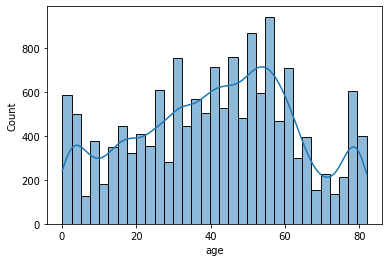

In [23]:
import seaborn as sns
sns.histplot(data = train['age'], kde = True)

<AxesSubplot:xlabel='age', ylabel='Count'>

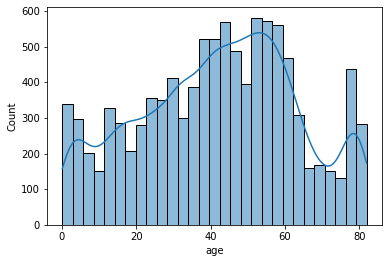

In [24]:
sns.histplot(data = test['age'], kde = True)

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV, SelectKBest, f_classif
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import pprint
from sklearn.svm import SVC
import xgboost as xgb
def rfe_cv(estimator,step,cv,scoring,X_train,y_train):
    # Instantiate Recursive Feature Elimination object
    selector = RFECV(estimator=estimator, step=step, cv=cv, scoring=scoring)
    # Fit to training data.
    selector.fit(X_train,y_train)
    # Print and return selected and removed columns. 
    selected_columns = X_train.columns[selector.support_]
    removed_columns = X_train.columns[~selector.support_]
    print('*'*20+'SELECTED'+'*'*19)
    pprint.pprint(list(selected_columns))
    print('\n'+'*'*20+'REMOVED'+'*'*20)
    pprint.pprint(list(removed_columns))
    return selected_columns

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [27]:
X = train.drop(['stroke'], axis=1)
y = train['stroke']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [29]:
# Instantiate the estimator with best params.
logreg_final = LogisticRegression(C=0.1, class_weight='balanced', penalty='l2')

In [30]:
# Run RFECV. 
log_selector = rfe_cv(logreg_final,1,5,'f1', X_train, y_train)
log_selector

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


********************SELECTED*******************
['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'gender_Female',
 'gender_Male',
 'NotMarried',
 'Govt_job',
 'Never_worked',
 'Private',
 'Self-employed',
 'Rural',
 'formerly_smoked',
 'never_smoked',
 'smokes']

********************REMOVED********************
[]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'NotMarried', 'Govt_job',
       'Never_worked', 'Private', 'Self-employed', 'Rural', 'formerly_smoked',
       'never_smoked', 'smokes'],
      dtype='object')

In [31]:
# Model with best params.
xg_final = xgb.XGBClassifier(scale_pos_weight=2, objective='binary:logistic', min_depth= 5, min_child_weight=1, eta=0.3)

# Run RFECV. 
xg_selector = rfe_cv(xg_final,1,5,'f1', X_train, y_train)
xg_selector

[16:45:16] WARNING: ../src/learner.cc:627: 
Parameters: { "min_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:45:17] WARNING: ../src/learner.cc:627: 
Parameters: { "min_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:45:18] WARNING: ../src/learner.cc:627: 
Parameters: { "min_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but g

Index(['age', 'hypertension', 'avg_glucose_level', 'NotMarried', 'smokes'], dtype='object')

In [32]:
rf_final = RandomForestClassifier(n_estimators= 270, min_samples_split= 6, max_depth= 41)
rf_selector = rfe_cv(rf_final,1,5,'f1', X_train, y_train)
rf_selector

********************SELECTED*******************
['age', 'avg_glucose_level']

********************REMOVED********************
['hypertension',
 'heart_disease',
 'bmi',
 'gender_Female',
 'gender_Male',
 'NotMarried',
 'Govt_job',
 'Never_worked',
 'Private',
 'Self-employed',
 'Rural',
 'formerly_smoked',
 'never_smoked',
 'smokes']


Index(['age', 'avg_glucose_level'], dtype='object')

In [33]:
# Fit using f_classif. 
svm_features= SelectKBest(f_classif, k=5).fit(X_train,y_train)
# Gets the best features.  
svm_selected = svm_features.get_support()
# Adds corresponding column names and prints. 
svm_selected_features = [ f for i,f in enumerate(X_train.columns) if svm_selected[i]]
pprint.pprint('F_classif selected {} features: {}.'.format(svm_selected.sum(),
   svm_selected_features))

("F_classif selected 5 features: ['age', 'hypertension', 'heart_disease', "
 "'avg_glucose_level', 'NotMarried'].")


In [34]:
X_train_1 = X_train[['age', 'hypertension', 'avg_glucose_level', 'NotMarried', 'smokes', 'heart_disease']]
X_train_1.head()

,age,hypertension,avg_glucose_level,NotMarried,smokes,heart_disease
3355,22.0,0,56.48,1,1,0
6756,18.0,0,67.20,1,0,0
12710,27.0,0,110.70,0,0,0
1590,34.0,0,80.57,0,1,0
12308,25.0,0,106.08,0,0,0


In [35]:
X_test_1 = X_test[['age', 'hypertension', 'avg_glucose_level', 'NotMarried', 'smokes', 'heart_disease']]

In [36]:
from sklearn.linear_model import LogisticRegression
logit_cls = LogisticRegression(random_state = 0)
logit_cls.fit(X_train_1, y_train)

LogisticRegression(random_state=0)

In [37]:
y_pred = logit_cls.predict_proba(X_test_1)[::,1]

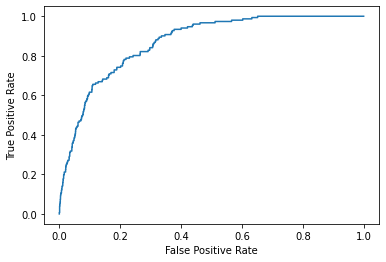

In [38]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

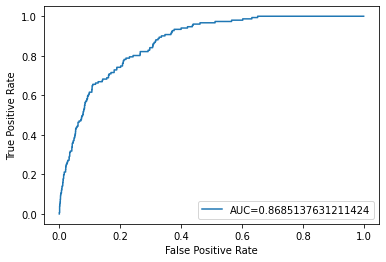

In [39]:
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [40]:
test_2 = test[['age', 'hypertension', 'avg_glucose_level', 'NotMarried', 'smokes','heart_disease']]

In [41]:
y_pred_test = logit_cls.predict_proba(test_2)[::,1]
y_pred_test

array([0.03271702, 0.14361413, 0.0004167 , ..., 0.00034813, 0.00312784,
       0.00026686])

In [42]:
df_sub = pd.DataFrame(columns=["id","stroke"])
df_sub["id"] = test_1["id"]
df_sub["stroke"] = y_pred_test
df_sub.head()

,id,stroke
0,15304,0.032717
1,15305,0.143614
2,15306,0.000417
3,15307,0.040793
4,15308,0.006932


In [43]:
df_sub.to_csv("logistic_2.csv",index=False)

In [44]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators = 100)  
clf_rf.fit(X_train_1, y_train)

y_pred_rf = clf_rf.predict(X_test_1)

In [45]:
y_pred_rf_p = clf_rf.predict_proba(X_test_1)[::,1]

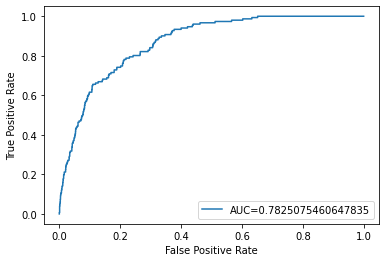

In [46]:
auc = metrics.roc_auc_score(y_test, y_pred_rf_p)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [47]:
y_pred_rf_p = clf_rf.predict_proba(test_2)[::,1]
df_sub["id"] = test_1["id"]
df_sub["stroke"] = y_pred_rf_p
df_sub.head()
df_sub.to_csv("rf_2.csv",index=False)

In [48]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train_1, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [49]:
y_pred_xgb_p = xgbc.predict_proba(X_test_1)[::,1]

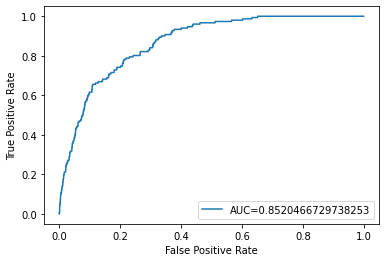

In [50]:
auc = metrics.roc_auc_score(y_test, y_pred_xgb_p)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [51]:
y_pred_xgb_p = xgbc.predict_proba(test_2)[::,1]
df_sub["id"] = test_1["id"]
df_sub["stroke"] = y_pred_xgb_p
df_sub.head()
df_sub.to_csv("xgb_2.csv",index=False)